# Multiple Linear Regression in Statsmodels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives
You will be able to:
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Use standardization/normalization on features of a dataset
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Use statsmodels to fit a multiple linear regression model
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters


## The Ames Housing Data

Using the specified continuous and categorical features, preprocess your data to prepare for modeling:
* Split off and one hot encode the categorical features of interest
* Log and scale the selected continuous features

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.formula.api import ols
# test = sms.jarque_bera(model.resid)

ames = pd.read_csv('ames.csv')

continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']


## Continuous Features

'NormaltestResult(statistic=2590.5918682864976, pvalue=0.0)'

'NormaltestResult(statistic=461.00674156689803, pvalue=7.82812962817983e-101)'

'NormaltestResult(statistic=437.12025688620986, pvalue=1.203766500154145e-95)'

'NormaltestResult(statistic=610.8359109472653, pvalue=2.283848353787728e-133)'

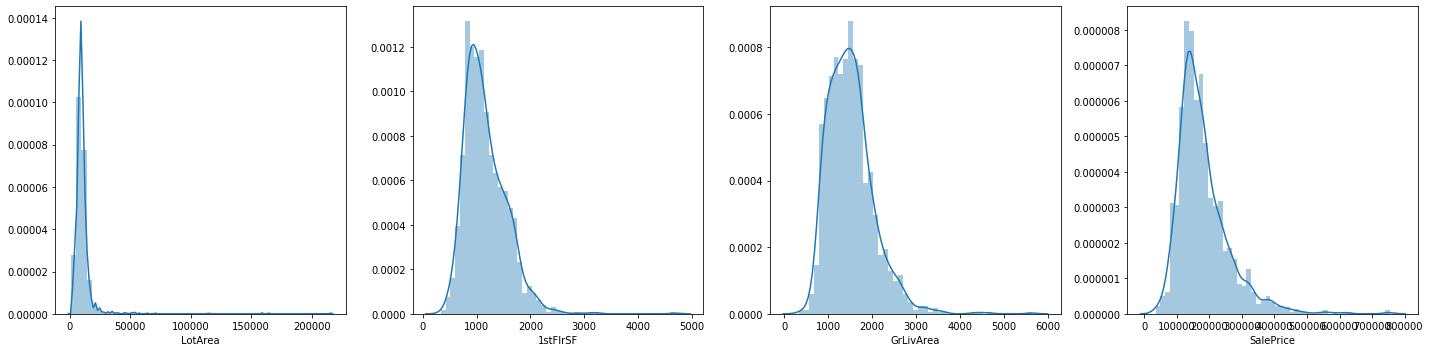

In [2]:
# Log transform and normalize
plotNumber = 1
plt.figure(figsize=(20,5))

for x in continuous:
    ax1 = plt.subplot(1,4, plotNumber)
    sns.distplot(ames[x], ax = ax1)
    plotNumber += 1
    display(f'{stats.normaltest(ames[x])}')
plt.tight_layout()
plt.show()

,LotArea,1stFlrSF,GrLivArea,SalePrice
0,-0.133185,-0.803295,0.529078,0.559876
1,0.113403,0.418442,-0.381715,0.212692
2,0.419917,-0.576363,0.659449,0.733795
3,0.103311,-0.439137,0.541326,-0.437232
4,0.878108,0.112229,1.281751,1.014303


'NormaltestResult(statistic=2590.5918682864976, pvalue=0.0)'

'NormaltestResult(statistic=461.00674156689803, pvalue=7.82812962817983e-101)'

'NormaltestResult(statistic=437.12025688620986, pvalue=1.203766500154145e-95)'

'NormaltestResult(statistic=610.8359109472653, pvalue=2.283848353787728e-133)'

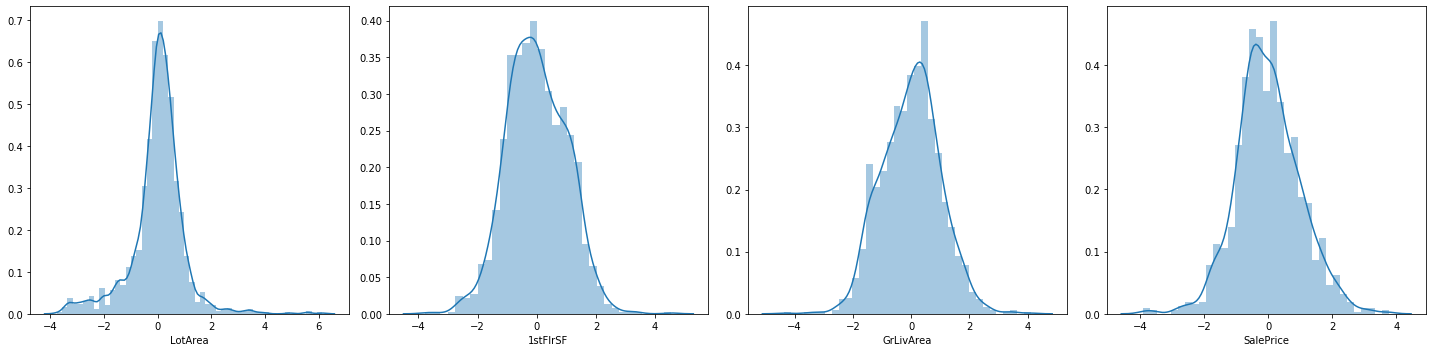

In [32]:
dfContLog = ames[continuous].applymap(lambda x: np.log(x))
for y in dfContLog.columns:
    dfContLog[y] = (dfContLog[y].apply(lambda x: (x - dfContLog[y].mean())/dfContLog[y].std()))
display(dfContLog.head())
plotNumber = 1
plt.figure(figsize=(20,5))

for x in continuous:
    ax1 = plt.subplot(1,4, plotNumber)
    sns.distplot(dfContLog[x], ax = ax1)
    display(f'{stats.normaltest(ames[x])}')

    plotNumber += 1
plt.tight_layout()
plt.show()

## Categorical Features

In [33]:
dfDummies = pd.get_dummies(ames[categoricals])
dfDummies.head()

,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleType_COD,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


## Combine Categorical and Continuous Features

In [34]:
dfFinal = pd.concat([dfContLog,dfDummies], axis = 1)
dfFinal['MSZoning_C (all)']

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: MSZoning_C (all), Length: 1460, dtype: uint8

## Run a linear model with SalePrice as the target variable in statsmodels

In [35]:
independantVariables = [x.strip() for x in dfFinal.columns if x not in ['SalePrice', '1stFlrSF', 'MSZoning_C (all)']]
independantVariablesString = '+' .join(independantVariables)
outcome = 'SalePrice'
f = outcome + '~' + independantVariablesString
print(f)
model = ols(formula=f, data=dfFinal).fit()
model.summary()

SalePrice~LotArea+GrLivArea+BldgType_1Fam+BldgType_2fmCon+BldgType_Duplex+BldgType_Twnhs+BldgType_TwnhsE+KitchenQual_Ex+KitchenQual_Fa+KitchenQual_Gd+KitchenQual_TA+SaleType_COD+SaleType_CWD+SaleType_Con+SaleType_ConLD+SaleType_ConLI+SaleType_ConLw+SaleType_New+SaleType_Oth+SaleType_WD+MSZoning_FV+MSZoning_RH+MSZoning_RL+MSZoning_RM+Street_Grvl+Street_Pave+Neighborhood_Blmngtn+Neighborhood_Blueste+Neighborhood_BrDale+Neighborhood_BrkSide+Neighborhood_ClearCr+Neighborhood_CollgCr+Neighborhood_Crawfor+Neighborhood_Edwards+Neighborhood_Gilbert+Neighborhood_IDOTRR+Neighborhood_MeadowV+Neighborhood_Mitchel+Neighborhood_NAmes+Neighborhood_NPkVill+Neighborhood_NWAmes+Neighborhood_NoRidge+Neighborhood_NridgHt+Neighborhood_OldTown+Neighborhood_SWISU+Neighborhood_Sawyer+Neighborhood_SawyerW+Neighborhood_Somerst+Neighborhood_StoneBr+Neighborhood_Timber+Neighborhood_Veenker


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     150.6
Date:                Mon, 13 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:42:36   Log-Likelihood:                -775.27
No. Observations:                1460   AIC:                             1645.
Df Residuals:                    1413   BIC:                             1893.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.4411      0.085     -5.201      0.000      -0.607      -0.275
LotArea                  0.1386      0.019      7.342      0.000       0.102       0.176
GrLivArea                0.4281      0.015     28.920      0.000       0.399       0.457
BldgType_1Fam            0.0558      0.038      1.485      0.138      -0.018       0.130
BldgType_2fmCon         -0.1297      0.075     -1.721      0.085      -0.278       0.018
BldgType_Duplex         -0.3082      0.060     -5.159      0.000      -0.425      -0.191
BldgType_Twnhs          -0.0923      0.076     -1.209      0.227      -0.242       0.057
BldgType_TwnhsE          0.0333      0.050      0.669      0.503      -0.064       0.131
KitchenQual_Ex           0.4435      0.049      9.068      0.000       0.348       0.539
KitchenQual_Fa          -0.6241      0.061    -10.239      0.000      -0.744      -0.504
KitchenQual_Gd           0.0215      0.034      0.642      0.521      -0.044       0.087
KitchenQual_TA          -0.2821      0.032     -8.714      0.000      -0.346      -0.219
SaleType_COD            -0.2051      0.082     -2.490      0.013      -0.367      -0.044
SaleType_CWD             0.0580      0.196      0.296      0.768      -0.327       0.443
SaleType_Con             0.3160      0.277      1.142      0.253      -0.227       0.859
SaleType_ConLD           0.0788      0.140      0.562      0.575      -0.196       0.354
SaleType_ConLI          -0.2528      0.177     -1.426      0.154      -0.601       0.095
SaleType_ConLw          -0.3077      0.178     -1.730      0.084      -0.657       0.041
SaleType_New             0.0752      0.070      1.073      0.284      -0.062       0.213
SaleType_Oth            -0.1254      0.224     -0.560      0.576      -0.565       0.314
SaleType_WD             -0.0780      0.059     -1.313      0.189      -0.195       0.039
MSZoning_FV              0.9064      0.197      4.601      0.000       0.520       1.293
MSZoning_RH              0.8495      0.199      4.264      0.000       0.459       1.240
MSZoning_RL              0.9893      0.166      5.958      0.000       0.664       1.315
MSZoning_RM              1.1177      0.156      7.184      0.000       0.813       1.423
Street_Grvl             -0.1134      0.114     -0.996      0.319      -0.337       0.110
Street_Pave             -0.3277      0.088     -3.727      0.000      -0.500      -0.155
Neighborhood_Blmngtn     0.3625      0.113      3.214      0.001       0.141       0.584
Neighborhood_Blueste     0.1212      0.293      0.413      0.679      -0.454       0.696
Neighborhood_BrDale     -0.3879      0.124     -3.131      0.002      -0.631      -0.145
Neighborhood_BrkSide    -0.4587      0.065     -7.110      0.000      -0.585      -0.332
Neighborhood_ClearCr    -0.0048      0.084     -0.057    

## Run the same model in scikit-learn

In [36]:
# # Your code here - Check that the coefficients and intercept are the same as those from Statsmodels
# from sklearn.linear_model import LinearRegression
# y = dfFinal['SalePrice']
# linreg = LinearRegression()
# linreg.fit(dfFinal.drop('SalePrice', axis = 1), y)
# linreg.coef_

## Predict the house price given the following characteristics (before manipulation!!)

Make sure to transform your variables as needed!

- LotArea: 14977
- 1stFlrSF: 1976
- GrLivArea: 1976
- BldgType: 1Fam
- KitchenQual: Gd
- SaleType: New
- MSZoning: RL
- Street: Pave
- Neighborhood: NridgHt

In [ ]:
model.predict([14977, 0, 1976])

## Summary
Congratulations! You pre-processed the Ames Housing data using scaling and standardization. You also fitted your first multiple linear regression model on the Ames Housing data using statsmodels and scikit-learn!